## **Thu thập dữ liệu**

#### Chủ đề của dữ liệu là gì?
  * **Chủ đề:** Bộ dữ liệu chứa thông tin chi tiết về các bài hát trên nền tảng ứng dụng **Spotify**, bao gồm các đặc trưng âm thanh như **danceability** (độ có thể nhảy), **energy** (năng lượng), **key** (điệu), và **popularity** (độ phổ biến).
  * **Bối cảnh:** Dữ liệu đại diện cho các bài hát thuộc 125 thể loại nhạc khác nhau, phản ánh đặc điểm âm nhạc và mức độ phổ biến của chúng trên nền tảng ứng dụng Spotify.

#### Nguồn gốc của dữ liệu là ở đâu?
  * **Nền tảng:** Hugging Face.
  * **URL:** [Hugging Face](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset)
  * **Tác giả:** Maharshi Pandya.
  * **Ngày công bố:** Bộ dữ liệu được cập nhật khoảng 2 năm trước (theo thông tin commit trên Hugging Face).

#### Dữ liệu này có được cấp phép để bạn sử dụng không?
  * **Giấy phép:** Trên Hugging Face, dataset được ghi giấy phép là **BSD** $\to$ Điều này cho phép sử dụng cho mục đích giáo dục và nghiên cứu.
  * **Cách sử dụng:** Bạn được phép sử dụng để phân tích và xây dựng mô hình học máy.

#### Phương pháp để thu thập dữ liệu này là gì?
  * **Phương pháp:** Dữ liệu được thu thập và làm sạch bằng cách sử dụng **Spotify Web API** thông qua Python. Tác giả đã truy xuất các tính năng âm thanh cho các bài hát từ nhiều thể loại khác nhau.
  * **Đối tượng mẫu:** Bao gồm khoảng 114,000 bài hát thuộc 125 thể loại khác nhau.
  * **Quy trình:** Dữ liệu không phải là ngẫu nhiên hoàn toàn mà được truy vấn theo danh sách các thể loại nhạc để đảm bảo sự đa dạng và cân bằng giữa các lớp.
  * **Hạn chế:** Vì dữ liệu được lấy qua API tại một thời điểm nhất định (năm 2022), chỉ số độ phổ biến mang tính thời điểm và có thể đã thay đổi so với hiện tại.

#### Lý do để nhóm chọn dataset này là gì?
  * **Hứng thú:** Nhóm quan tâm đến lĩnh vực âm nhạc và muốn tìm hiểu các yếu tố kỹ thuật như nhịp điệu nhanh hay chậm, bài hát buồn hay vui,... ảnh hưởng thế nào đến sự phổ biến của một bài hát.
  * **Tiềm năng phân tích:** Dataset có kích thước đủ lớn (hơn 100 nghìn dòng, 21 cột), chứa cả dữ liệu số và phân loại, rất phù hợp để đặt câu hỏi về phân lớp (Classification - ví dụ: dự đoán thể loại nhạc) hoặc hồi quy (Regression - ví dụ: dự đoán độ phổ biến).

## **Khám phá dữ liệu**

### **Khai báo thư viện**

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

### **Tổng quan về dữ liệu**

#### Dữ liệu có bao nhiêu dòng, bao nhiêu cột và kiểu dữ liệu của từng cột là gì? 

In [89]:
# Đọc dữ liệu
df = pd.read_csv('../data/raw/spotify_dataset.csv')

# Xem 5 dòng đầu tiên
display(df.head())

# Tổng quan kích thước (Rows, Columns)
print(f"Số dòng: {df.shape[0]}")
print(f"Số cột: {df.shape[1]}")

# Kiểm tra kiểu dữ liệu và bộ nhớ
print("\nThông tin về kiểu dữ liệu")
df.info()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Số dòng: 114000
Số cột: 21

Thông tin về kiểu dữ liệu
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalne

#### Các dòng của dữ liệu có bị trùng lặp hay không?

In [90]:
# Kiểm tra dòng trùng lặp
num_duplicates = df.duplicated().sum()
print(f"Số dòng bị trùng lặp: {num_duplicates}")

Số dòng bị trùng lặp: 0


#### Dữ liệu có bị thiếu hay không? 

In [91]:
# Kiểm tra dữ liệu bị thiếu
missing_values = df.isnull().sum()
print("\n--- Số lượng giá trị bị thiếu (Null) ---")
print(missing_values[missing_values > 0]) # Chỉ in các cột có dữ liệu thiếu


--- Số lượng giá trị bị thiếu (Null) ---
artists       1
album_name    1
track_name    1
dtype: int64


#### Từng cột có ý nghĩa gì?

* **track_id:** ID duy nhất của bài hát trên Spotify.
* **artists:** Tên nghệ sĩ biểu diễn.
* **album_name:** Tên album chứa bài hát.
* **track_name:** Tên bài hát.
* **popularity:** Điểm phổ biến (0-100), càng cao càng nổi tiếng.
* **duration_ms:** Độ dài bài hát tính bằng mili-giây.
* **explicit:** Đánh dấu bài hát có nội dung nhạy cảm hay không.
* **danceability:** Độ thích hợp để nhảy (0.0 - 1.0).
* **energy:** Mức năng lượng/cường độ của bài hát (0.0 - 1.0).
* **key:** Tông nhạc.
* **loudness:** Độ to trung bình (dB).
* **mode:** Điệu thức (1 = Major/Trưởng, 0 = Minor/Thứ).
* **speechiness:** Mức độ chứa từ ngữ.
* **acousticness:** Độ mộc của bài hát.
* **instrumentalness:** Dự đoán bài hát không có lời.
* **liveness:** Xác suất bài hát được thu âm trực tiếp.
* **valence:** Cảm xúc tích cực của bài hát.
* **tempo:** Nhịp độ.
* **time_signature:** Số chỉ nhịp.
* **track_genre:** Thể loại nhạc.

#### Những cột nào có liên quan đến phân tích tiềm năng?

Hầu hết các cột đều quan trọng. Đặc biệt là các đặc trưng âm thanh (**danceability**, **energy**, **valence**, **tempo**...) để chạy mô hình, và **track_genre**, **popularity** làm biến mục tiêu.

#### Có cột nào cần được bỏ đi không? Tại sao?

Cần xóa cột **Unnamed** (thường là chỉ số index thừa từ file CSV cũ) và **track_id** (không có giá trị phân tích mô hình, chỉ dùng để định danh lúc đầu).

#### Có cột nào có kiểu dữ liệu không phù hợp không?
Thường bộ dữ liệu này khá chuẩn. Tuy nhiên, cần kiểm tra cột **explicit**. Đôi khi pandas đọc nó là *Object* (chuỗi "True"/ hoặc "False") thay vì *Boolean*.


#### Những cột nào cần chuyển đổi loại?

* Nếu **explicit** đang là object, cần chuyển sang boolean hoặc int (1/0).
* **duration_ms** có thể chuyển đổi từ mili-giây sang phút để dễ hình dung hơn khi phân tích, dù không bắt buộc về mặt kỹ thuật.

### **Phân tích các cột số**

In [92]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Loại bỏ các cột mang giá trị là số nhưng bản chất đặc trưng là định danh
non_numerical_cols = ['Unnamed: 0', 'key', 'mode', 'time_signature']
for col in non_numerical_cols:
    numerical_cols.remove(col)

numerical_cols

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

#### Hình dạng phân phối của từng đặc trưng số là gì?

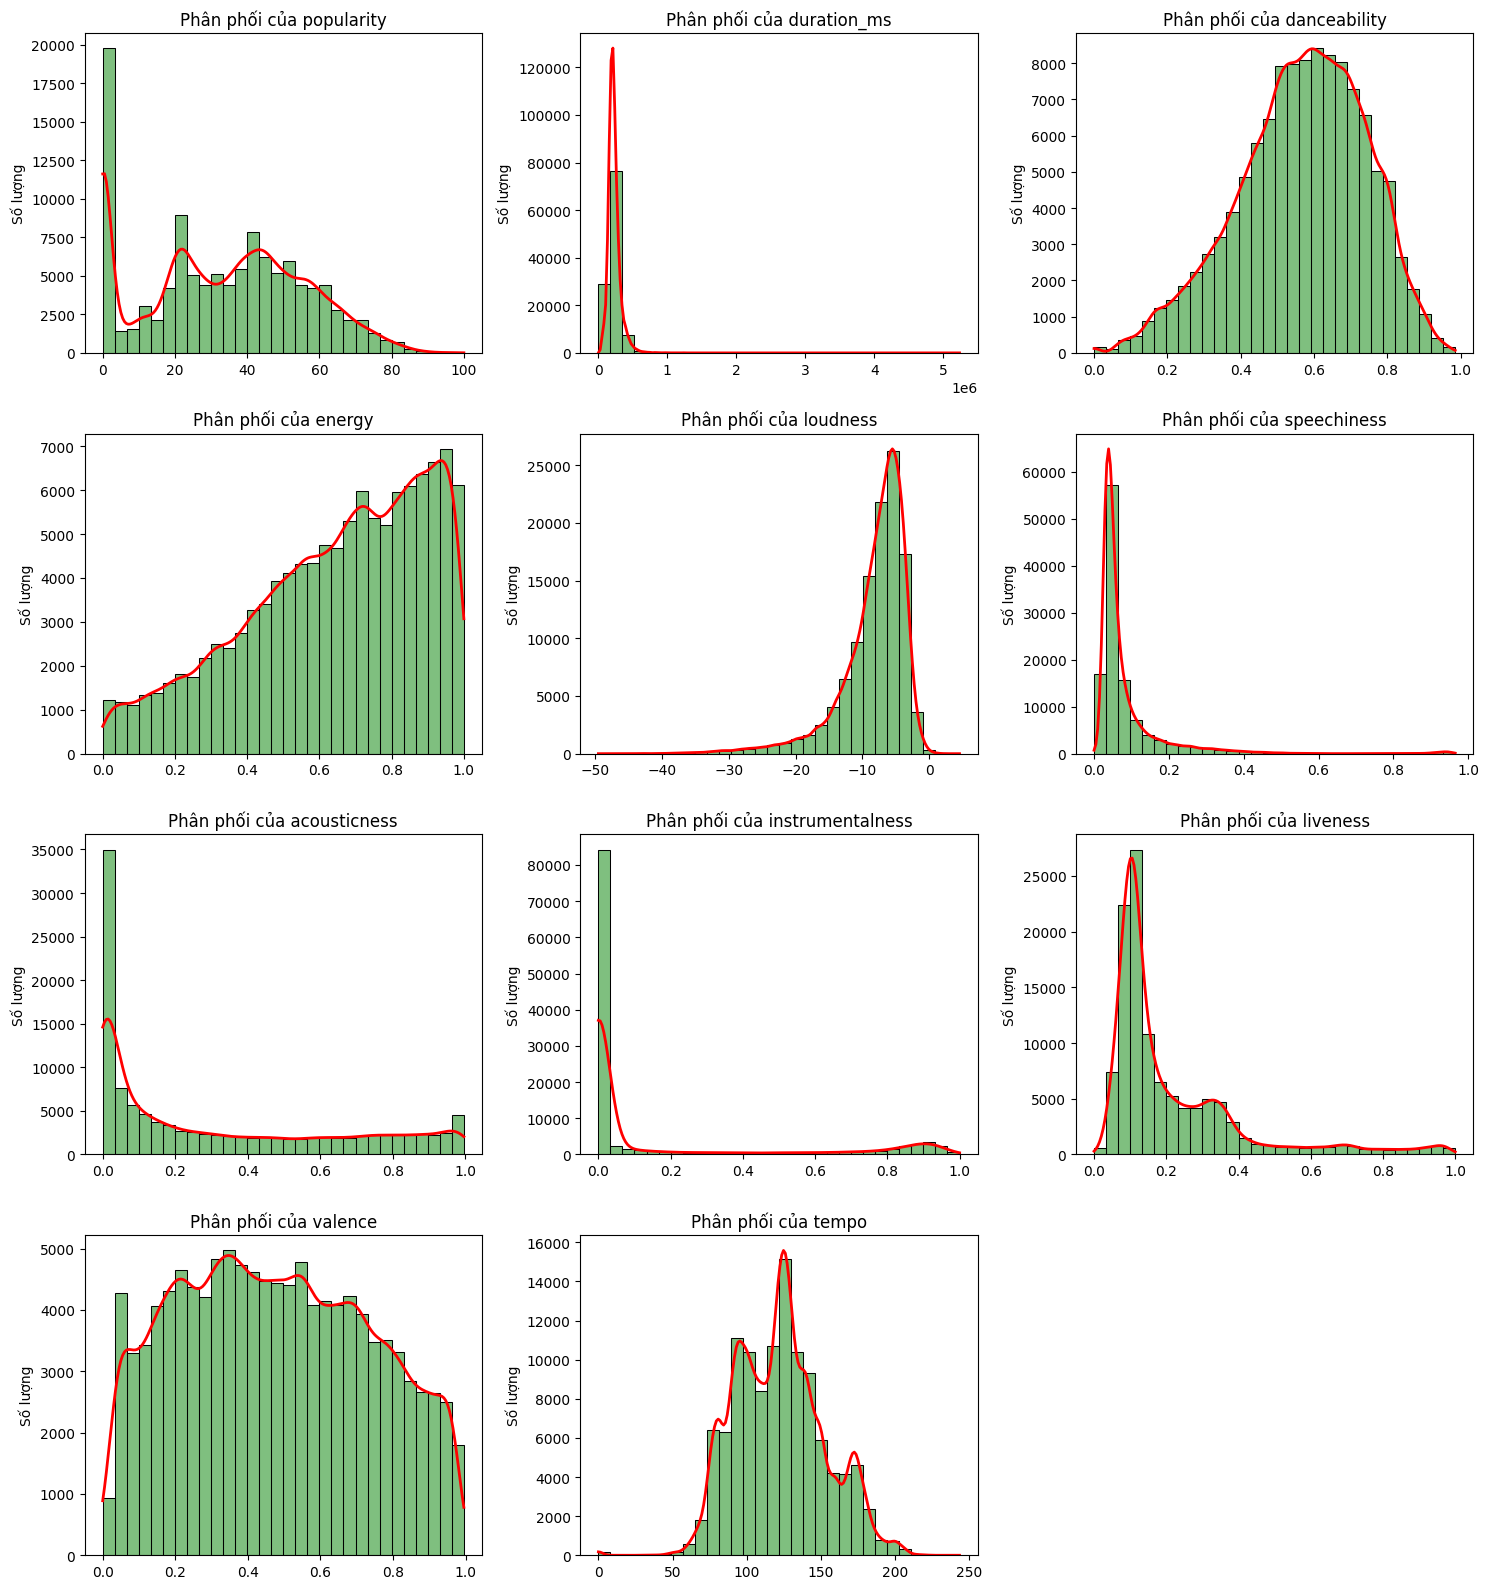

In [93]:
# Tính toán kích thước lưới biểu đồ
num_plots = len(numerical_cols)
cols = 3  # Số biểu đồ trên 1 hàng
rows = math.ceil(num_plots / cols)  # Tự động tính số hàng cần thiết

# Vẽ biểu đồ
fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows)) # Điều chỉnh kích thước tổng thể
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color='green', edgecolor='black')

    if len(axes[i].lines) > 0:
        axes[i].lines[0].set_color('red')       # Đổi màu thành đỏ
        axes[i].lines[0].set_linewidth(2)

    axes[i].set_title(f'Phân phối của {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Số lượng')

# Ẩn các ô biểu đồ thừa
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* Phân phối Chuẩn: **danceability**, **valence** và **tempo**
* Phân phối Lệch:
    * Lệch phải: **loudness** và **energy**
    * Lệch trái: **popularity**, **duration_ms**, **speechiness**, **acousticness**, **instrumentalness** và **liveness**

#### Giá trị lớn nhất/nhỏ nhất, trung bình cộng, trung vị, độ lệch chuẩn của từng đặc trưng số là gì?

In [94]:
display(df.drop(columns=[col for col in non_numerical_cols if col in df.columns]).describe())

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,-8.258960,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837
std,22.305078,1.072977e+05,0.173542,0.251529,5.029337,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197
min,0.000000,0.000000e+00,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,-10.013000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750
50%,35.000000,2.129060e+05,0.580000,0.685000,-7.004000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000
75%,50.000000,2.615060e+05,0.695000,0.854000,-5.003000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000
max,100.000000,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


#### Các giá trị lớn nhất/nhỏ nhất có hợp lý không, nếu không thì chúng cho thấy có lỗi gì?

* **Các đặc trưng hợp lý:**
    * Các đặc trưng đã được chuẩn hóa (**danceability, energy, speechiness, acousticness, instrumentalness, liveness, valence**) đều nằm trọn trong khoảng **[0, 1]**.
    * Bên cạnh đó, **popularity** và **loudness** tuân thủ đúng định nghĩa thực tế.
* **Các đặc trưng có dấu hiệu lỗi:**
    * **tempo** và **duration_ms** đều có **min = 0**, đây là điều vô lý về mặt vật lý vì nhạc phải có nhịp và phải có thời gian lớn hơn bằng 0 $\to$ Đây là dấu hiệu có thể **dữ liệu bị thiếu** được điền tạm là 0.

#### Các giá trị ngoại lệ có phải là giá trị cực đoan thực sự hay chỉ là lỗi nhập liệu?

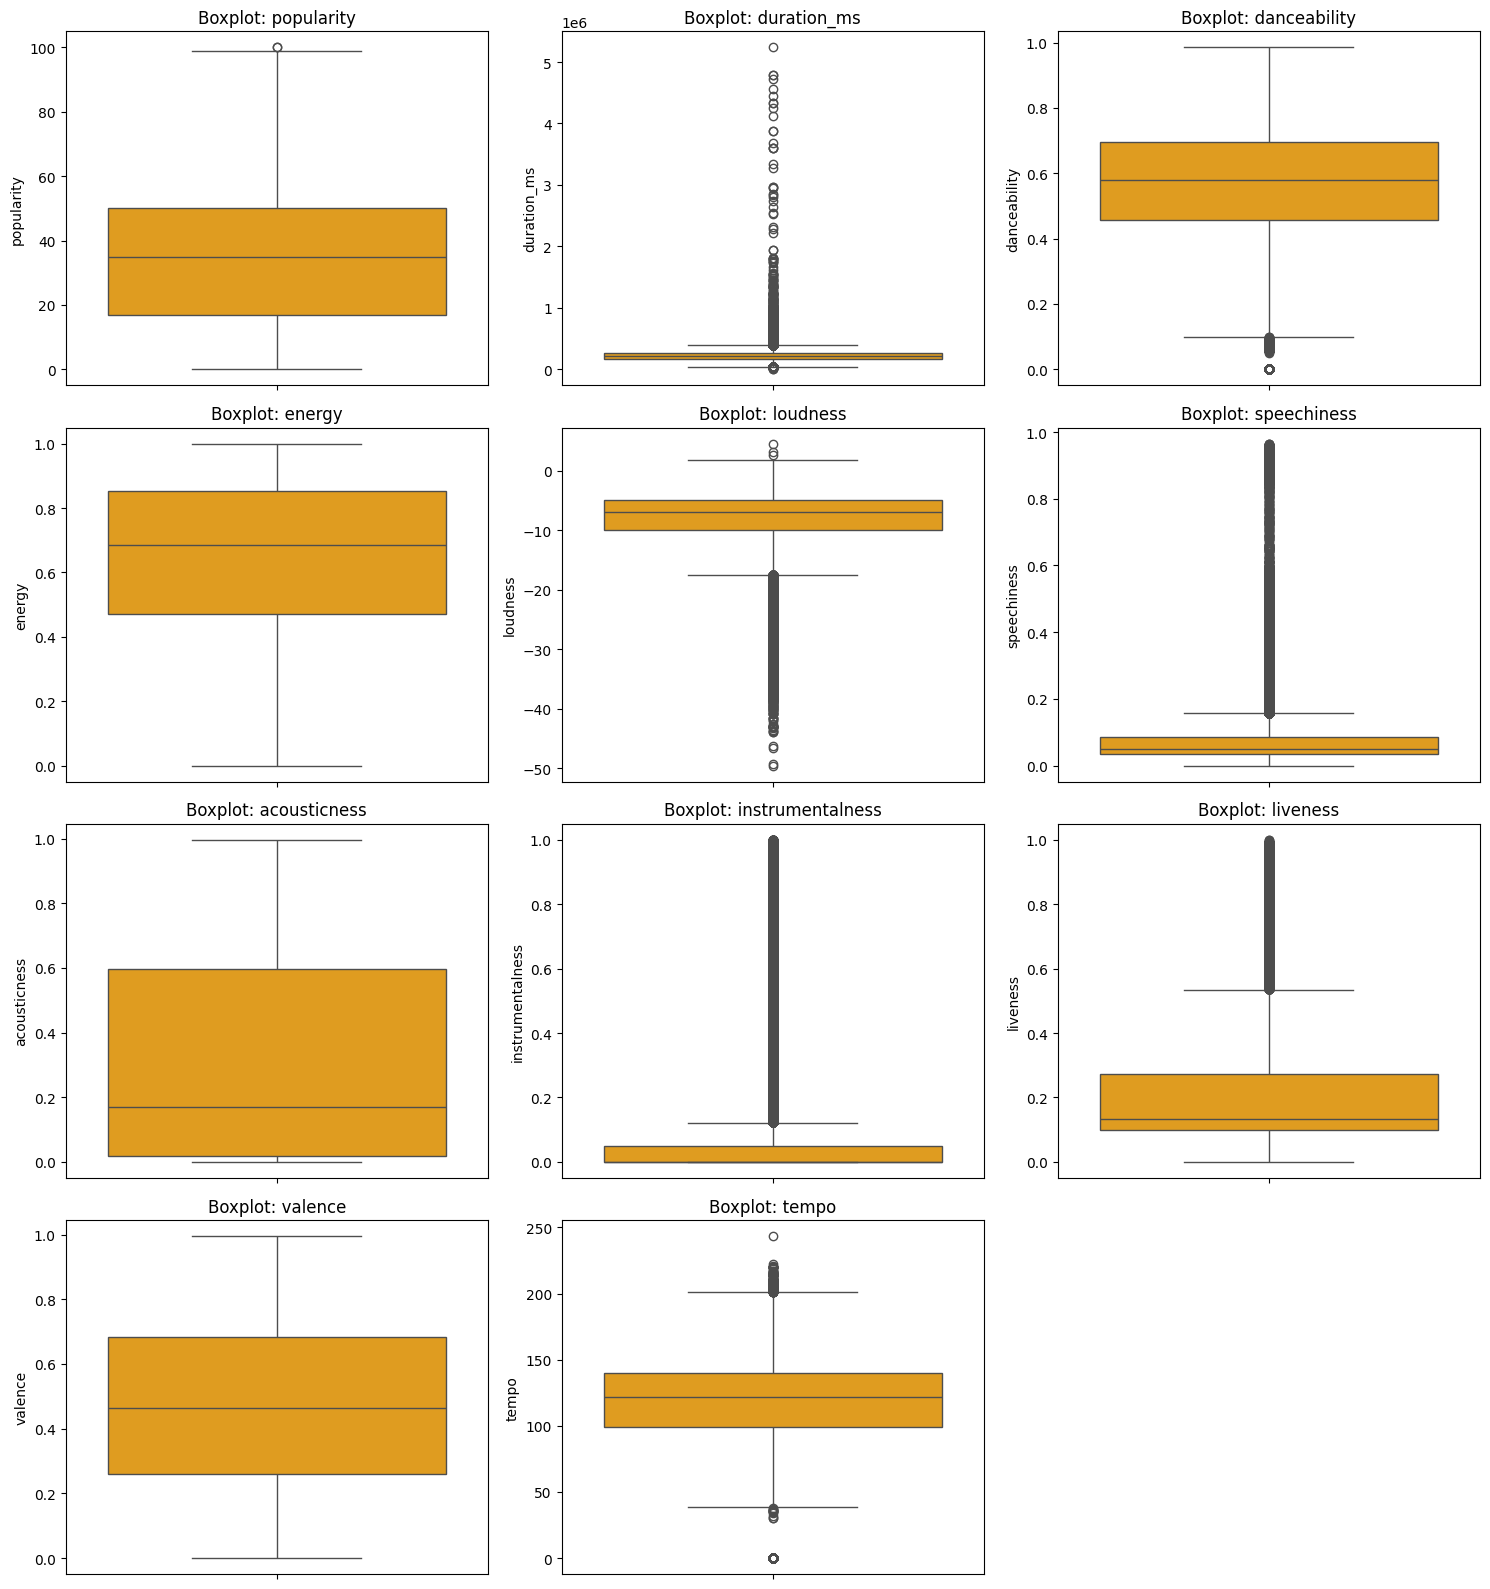

Phân tích ngoại lai bằng IQR


,Feature,Outliers count,Percentage,Lower bound,Upper bound
0,popularity,2,0.00,-32.50,99.50
1,duration_ms,5617,4.93,42906.00,392666.00
2,danceability,620,0.54,0.10,1.05
3,energy,0,0.00,-0.10,1.43
4,loudness,6173,5.41,-17.53,2.51
5,speechiness,13211,11.59,-0.04,0.16
6,acousticness,0,0.00,-0.85,1.47
7,instrumentalness,25246,22.15,-0.07,0.12
8,liveness,8642,7.58,-0.16,0.54
9,valence,0,0.00,-0.37,1.32


In [98]:
# Tính toán lưới biểu đồ
num_cols = 3
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='orange')
    axes[i].set_title(f'Boxplot: {col}')
    axes[i].set_xlabel('')

# Xóa các ô thừa
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("Phân tích ngoại lai bằng IQR")

def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)
    pct_outliers = (num_outliers / len(df)) * 100
    
    return num_outliers, pct_outliers, lower_bound, upper_bound

# Tạo bảng tổng hợp kết quả
outlier_report = []

for col in numerical_cols:
    num, pct, low, high = detect_outliers_iqr(df, col)
    outlier_report.append({
        'Feature': col,
        'Outliers count': num,
        'Percentage': round(pct, 2),
        'Lower bound': round(low, 2),
        'Upper bound': round(high, 2)
    })

# Hiển thị bảng kết quả
outlier_df = pd.DataFrame(outlier_report)
display(outlier_df)

**Nhận định về ngoại lai của các đặc trưng:**

* **duration_ms:**
    * **Quan sát:** Có rất nhiều ngoại lai vượt ngưỡng trên, một số bài dài tới hàng triệu ms.
    * **Kết luận:** Các bài hát này có thể là Podcast, nhạc giao hưởng, hoặc các bản Mix dài. Tuy nhiên, các giá trị ngoại lai ở mức thấp (bằng 0) là **lỗi** như đã phân tích ở trước đó $\to$ đa số vẫn là dữ liệu thực.

* **speechiness và instrumentalness:**
    * **Quan sát:** Tỷ lệ ngoại lai rất cao, lên đến xấp xỉ 12% và hơn 22%. 
    * **Kết luận:**
        * Với *Speechiness*: Có thể đa số các bài nhạc là hát nên có giá trị thấp, các bài Rap hoặc Podcast có giá trị cao sẽ bị coi là ngoại lai về mặt thống kê, nhưng chúng hoàn toàn hợp lệ $\to$ vẫn là dữ liệu thực.
        * Với *Instrumentalness*: Đa số bài có lời, nên các bài không lời (Beat/Instrumental) có thể sẽ hiện lên là ngoại lai $\to$ vẫn là dữ liệu thực.

* **loudness:**
    * **Quan sát:** Có các ngoại lai ở phía âm có giá trị lên đến **-50dB**.
    * **Kết luận:** Đây có thể là các bài nhạc cổ điển hoặc bài thiền, thu âm rất nhỏ so với nhạc Pop hiện đại.

* **tempo:**
    * **Quan sát:** Có ngoại lai bằng 0.
    * **Kết luận:** **min = 0** là **lỗi** dữ liệu cần xử lý như đã phân tích trước đó. Các ngoại lai ở mức cao (**lớn hơn 200 BPM**) có thể là dòng nhạc **Speedcore** hoặc **Drum & Bass** $\to$ đa số vẫn là dữ liệu thực.

* **liveness:**
    * **Quan sát:** Phân phối bị lệch phải mạnh, xuất hiện nhiều ngoại lai ở ngưỡng giá trị cao (trên 0.8).
    * **Kết luận:** Đa số các bài hát là bản thu âm trong phòng thu nên chỉ số này thường thấp. Các ngoại lai giá trị cao có thể là các bản thu âm trực tiếp $\to$ đây là dữ liệu thực và quan trọng để phân biệt tính chất bài hát.

* **danceability:**
    * **Quan sát:** Xuất hiện các ngoại lai ở mức giá trị cực thấp (gần bằng 0).
    * **Kết luận:** Đây là các bài hát hoặc âm thanh có nhịp độ rất khó để nhảy như nhạc thiền, podcast,... $\to$ vẫn là dữ liệu thực phản ánh sự đa dạng của kho nhạc.

#### Có giá trị nào không thể xảy ra không? Có giá trị giữ chỗ nào không?

Có, chúng ta đã phát hiện một số giá trị không thể xảy ra trong thực tế (về mặt vật lý âm thanh) nhờ vào việc phát hiện ra giá trị lớn nhất/nhỏ nhất của từng cột ở trước đó:
* **tempo**
    * **Phát hiện:** Giá trị nhỏ nhất của cột **tempo** là **0**.
    * **Lý do:** Nhịp độ (BPM - Beats Per Minute) đo tốc độ của bài hát. Một bài hát không thể có tốc độ bằng 0 (tức là đứng im).
* **duration_ms**
    * **Phát hiện:** Giá trị nhỏ nhất của cột **duration_ms** là **0**.
    * **Lý do:** Không thể coi một file âm thanh nào có độ dài là 0ms.

Ngoài ra, bộ dữ liệu này sử dụng số **0** làm giá trị giữ chỗ thay vì để trống cụ thể là cột **tempo** và **duraton__ms** có số **0** được dùng để lấp vào chỗ trống khi không thu thập được thông tin $\to$ Đây thực chất là **giá trị bị thiếu**.

In [ ]:
# Kiểm tra giá trị bất hợp lý và giá trị giữ chỗ
impossible_tempo = df[df['tempo'] == 0].shape[0]
impossible_time_sig = df[df['duration_ms'] == 0].shape[0]

print(f"Số bài hát có 'tempo' = 0: {impossible_tempo} dòng")
print(f"Số bài hát có 'duration_ms' = 0: {impossible_time_sig} dòng")

Số bài hát có 'tempo' = 0: 157 dòng
Số bài hát có 'duration_ms' = 0: 1 dòng
